In [ ]:
"""
Data Exploration Notebook
------------------------

This notebook analyzes the SciX dataset characteristics including:
- Dataset size and distribution
- Label frequencies and correlations
- Text length statistics
- Class imbalance analysis
"""

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter

In [2]:
# Load data
dataset = load_dataset("adsabs/SciX_UAT_keywords")
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['val'])

In [3]:
# Analyze labels
print("\n=== Label Analysis ===")
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")


=== Label Analysis ===
Training samples: 18677
Validation samples: 3025


In [4]:
# Count label occurrences
all_labels = train_df['verified_uat_labels'].explode().tolist()
label_counts = Counter(all_labels)

print("\nTop 20 Labels:")
for label, count in label_counts.most_common(20):
    print(f"{label}: {count}")


Top 20 Labels:
galaxy evolution: 947
active galactic nuclei: 901
interstellar medium: 900
star formation: 871
exoplanets: 670
solar wind: 638
neutron stars: 638
supermassive black holes: 556
high-redshift galaxies: 543
protoplanetary disks: 542
exoplanet atmospheres: 539
high energy astrophysics: 518
gamma-ray bursts: 485
quasars: 477
accretion: 465
magnetohydrodynamics: 449
astronomy data analysis: 440
spectroscopy: 403
solar flares: 399
gravitational waves: 390


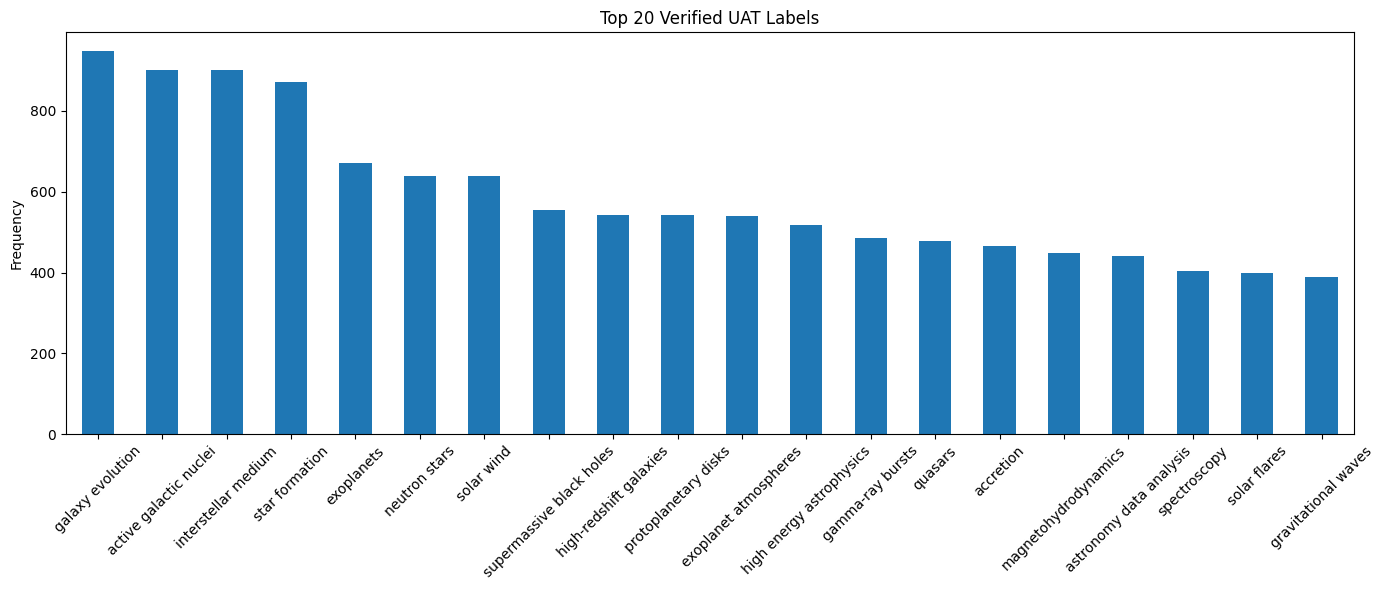

In [5]:
# Visualize
plt.figure(figsize=(14, 6))
pd.Series(label_counts).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Top 20 Verified UAT Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Labels per document stats:
count    18677.000000
mean         4.299834
std          2.138552
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         12.000000
Name: verified_uat_labels, dtype: float64


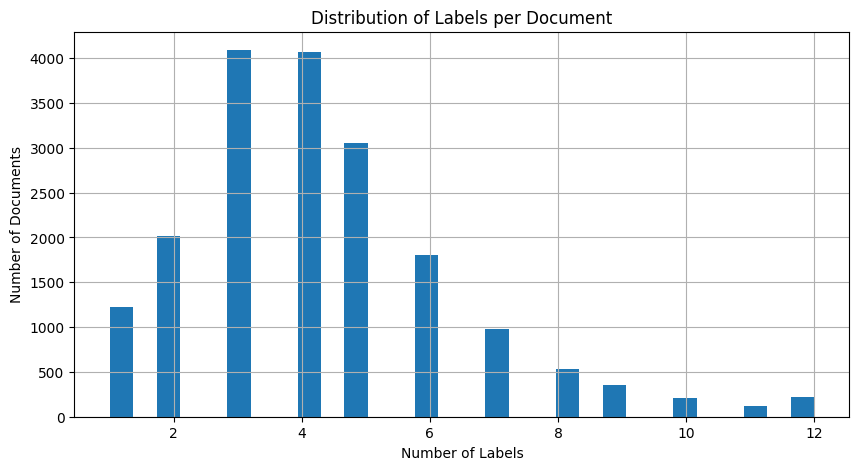

In [6]:
# Documents per label count
labels_per_doc = train_df['verified_uat_labels'].apply(len)
print("\nLabels per document stats:")
print(labels_per_doc.describe())

plt.figure(figsize=(10, 5))
labels_per_doc.hist(bins=30)
plt.title('Distribution of Labels per Document')
plt.xlabel('Number of Labels')
plt.ylabel('Number of Documents')
plt.show()